# Convert pdf to img

In [10]:
import pymupdf
from tqdm import tqdm

# Get all pdf files in the current directory
from pathlib import Path
pdf_files = list(Path().rglob("*.pdf"))

# Convert all pdf files to images
for pdf_file in tqdm(pdf_files):
    pdf = pymupdf.open(pdf_file)
    # Create a directory
    Path(pdf_file.stem).mkdir(exist_ok=True)

    for page in pdf:
        image = page.get_pixmap()
        image.save(f"{pdf_file.stem}/{pdf_file.stem}_{page.number}.png", "png")
    pdf.close()





100%|██████████| 6/6 [00:35<00:00,  5.84s/it]


# Open CV tests

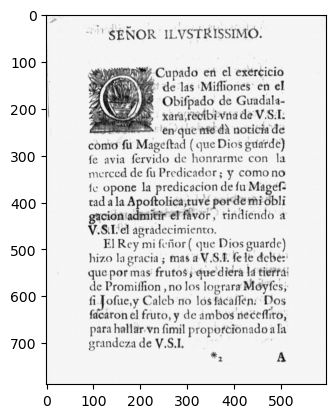

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from tqdm import tqdm

image_dir = Path("Ezcaray - Vozes")

# Load the image
image = cv2.imread(str(image_dir / "Ezcaray - Vozes_0.png"))

# Show the image
plt.imshow(image)


In [251]:
# Preprocessing functions

def align_text(img):
    coords = np.column_stack(np.where(img > 0))
    angle = cv2.minAreaRect(coords)[-1]
    print(angle)
    if angle == 0 or angle == -0.0 or angle == 90.0 or angle == -90.0: 
        return img
    if angle < -45:
        angle = -(90 + angle)
    elif angle > 45:
        angle = -(90 - angle)
    elif angle > 0:
        angle = -angle
    h,w = img.shape
    center = (w // 2, h // 2)
  
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h),
            flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


def preprocess_image(image,align_text=True):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    denoised = cv2.fastNlMeansDenoising(thresh, None, 30, 50, 30)

    # align the text
    if align_text:
        result = align_text(denoised)
    else:
        result = denoised
    return result
    
# Preprocess the image
preprocessed_image = preprocess_image(image)

# Show the preprocessed image
plt.imshow(preprocessed_image, cmap="gray")


TypeError: 'bool' object is not callable

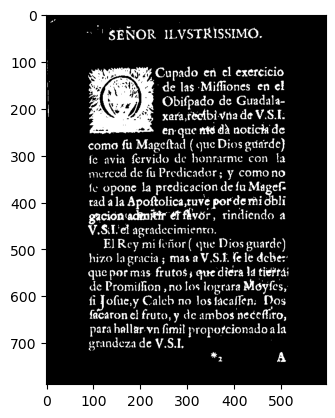

In [39]:
# Binary thresholding
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Show the binary image
plt.imshow(binary, cmap="gray")

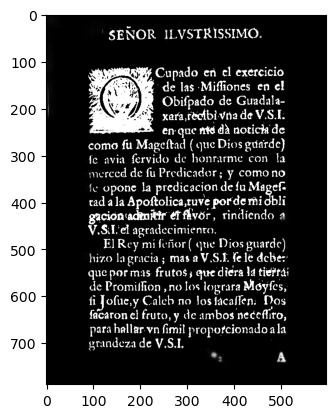

In [42]:
# Preprocessing
# Denoising
denoised = cv2.fastNlMeansDenoising(binary, None, 30, 50, 30)

# Show the denoised image
plt.imshow(denoised, cmap="gray")

0.9548412561416626
90.0


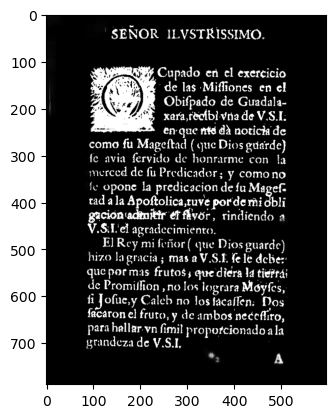

In [ ]:
# Text alignment

# align image text
img = align_text(denoised)
plt.imshow(img, cmap="gray")

plt.show()

In [290]:
# split text into rows

def split_rows(image,plot_hpp=False):
    # find sum of column values, row-wise
    a = np.sum(image == 255, axis=1)
    # Plot HPP 
    if plot_hpp:
        plt.plot(a)
        plt.show()

    # Smooth the HPP
    a = np.convolve(a, np.ones(10), mode='same')

    # Plot the smoothed HPP
    if plot_hpp:
        plt.plot(a)
        plt.show()

    # find the threshold value
    threshold = 0.2 * np.max(a)
    # find the rows where the sum of column values is lesser than the threshold
    rows = np.where(a < threshold)[0]

    # combine consecutive rows
    consecutive_rows = []
    prev = rows[0]

    row_pixel_threshold = 2

    for row in rows:
        if row - prev > row_pixel_threshold:
            consecutive_rows.append((prev, row))

        prev = row

    return consecutive_rows


# Test
rows = split_rows(img)
print(rows)
        


[(76, 115), (125, 151), (160, 193), (206, 232), (247, 314), (331, 356), (366, 395), (410, 435), (451, 476), (493, 517), (527, 556), (613, 638), (653, 679), (695, 720), (730, 760), (768, 801), (817, 842), (855, 881), (891, 921), (938, 962), (979, 1003), (1018, 1043), (1058, 1084), (1099, 1125), (1138, 1164), (1180, 1206)]


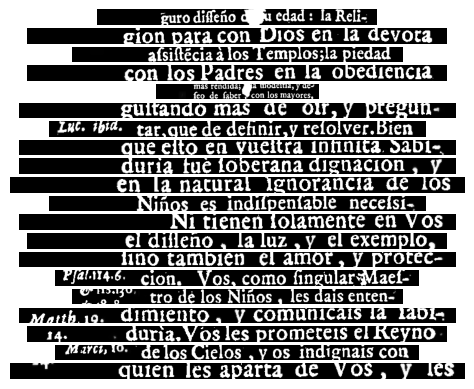

In [282]:
# Show the first n rows
n_rows = 20
for i, (start, end) in enumerate(rows[:n_rows]):
    plt.subplot(n_rows, 1, i + 1)
    plt.imshow(img[start:end], cmap="gray")
    plt.axis("off")
  

[(76, 115, 160, 213), (76, 115, 217, 233), (76, 115, 243, 348), (76, 115, 370, 437), (76, 115, 451, 523), (76, 115, 565, 569), (76, 115, 578, 588), (76, 115, 598, 664), (125, 151, 157, 235), (125, 151, 239, 378), (125, 151, 386, 467), (125, 151, 473, 515), (125, 151, 526, 560), (125, 151, 568, 682), (160, 193, 160, 379), (160, 193, 385, 567), (160, 193, 570, 681), (206, 232, 163, 224), (206, 232, 230, 286), (206, 232, 286, 398), (206, 232, 412, 454), (206, 232, 461, 496), (206, 232, 508, 681), (247, 314, 162, 212), (247, 314, 235, 267), (247, 314, 285, 367), (247, 314, 368, 421), (247, 314, 425, 435), (247, 314, 446, 472), (247, 314, 476, 528), (247, 314, 533, 596), (247, 314, 606, 616), (247, 314, 626, 666), (331, 356, 160, 306), (331, 356, 310, 374), (331, 356, 391, 430), (331, 356, 457, 515), (331, 356, 523, 534), (331, 356, 553, 667), (366, 395, 17, 56), (366, 395, 80, 132), (366, 395, 161, 324), (366, 395, 328, 467), (366, 395, 470, 682), (410, 435, 161, 292), (410, 435, 297, 340)

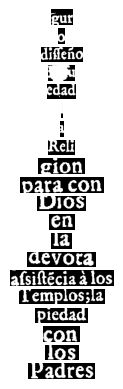

In [295]:
# Find vpp and split the text into words

def split_text_into_words(img,rows,plot_vpp=False):
    words = []
    for i,(start,end) in enumerate(rows):
        row_img = img[start:end]

        vpp = np.sum(row_img == 255, axis=0)
        vpp = np.convolve(vpp, np.ones(10), mode='same')
        vpp = np.convolve(vpp, np.ones(10), mode='same')

        if(plot_vpp):
            #plt.imshow(row_img, cmap="gray")
            plt.show()
            plt.plot(vpp)


        # find the threshold value
        threshold = 0.1 * np.max(vpp)
        # find the rows where the sum of column values is lesser than the threshold
        columns = np.where(vpp < threshold)[0]


        # combine consecutive cols
        consecutive_columns = []

        prev = columns[0]
        column_pixel_threshold = 2

        for column in columns:
            if column - prev > column_pixel_threshold:
                consecutive_columns.append((prev, column))

            prev = column

        words.append(consecutive_columns)

    # Create bounding boxes
    bounding_boxes = []
    for i, (start_row, end_row) in enumerate(rows):
        for j, (start_col, end_col) in enumerate(words[i]):
            bounding_boxes.append((start_row, end_row, start_col, end_col))

    return bounding_boxes

# Test
bounding_boxes = split_text_into_words(img,rows)
print(bounding_boxes)

# Show the first n words
n_words = 20
for i, (start_row, end_row, start_col, end_col) in enumerate(bounding_boxes[:n_words]):
    plt.subplot(n_words, 1, i + 1)
    plt.imshow(img[start_row:end_row, start_col:end_col], cmap="gray")
    plt.axis("off")

plt.show()



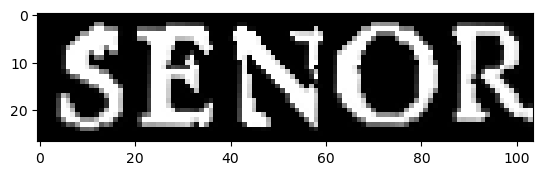

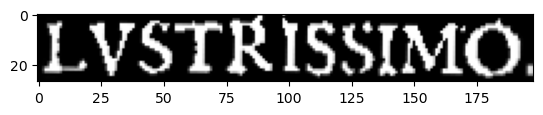

In [84]:
# Show all the words

for col in consecutive_columns:
    plt.imshow(row_img[:, col[0]:col[1]], cmap="gray")
    plt.show()

# Data for Ornamental letters

In [ ]:
# Download images from batyr 
url_template = "http://www.bvh.univ-tours.fr/batyr/beta/notice_bois.php?IdBois="

import requests

for i in tqdm(range(17787, 30000)):
    url = url_template + str(i)
    response = requests.get(url)
    if response.status_code == 200:
        # Get the jpg in the html
        jpg_url = response.text.find("_lettrine_")
        if (jpg_url == -1):
            continue
        jpg_url = response.text[jpg_url - 100:jpg_url + 20]
        #print(jpg_url)
        jpg_url = jpg_url.split("../")[1]
        jpg_url = jpg_url.split(".jpg")[0]
        jpg_url = jpg_url + ".jpg"


        jpg_url = "http://www.bvh.univ-tours.fr/batyr/" + jpg_url
        #print(i,jpg_url)

        letter_text = response.text.find("Lettre :")
        letter = "unk"
        if (letter_text != -1):
            letter_text = response.text[letter_text:letter_text + 30]
            #print("Letter_text:", letter_text)
            #print(i)
            letter = letter_text.split("</br>")[0] 
            #print("Letter:", letter)
            letter = letter.split(">")[1]
            
        #print("Letter:", letter)



        # Download the jpg
        jpg_response = requests.get(jpg_url)
        Path("images").mkdir(exist_ok=True)
        with open(f"images/{i}_{letter}.jpg", "wb") as f:
            f.write(jpg_response.content)

    else:
        continue

 18%|█▊        | 2656/14867 [36:35<2:48:15,  1.21it/s] 


KeyboardInterrupt: 

Counter({'A': 124, 'S': 118, 'C': 118, 'I': 112, 'E': 104, 'L': 100, 'Q': 94, 'P': 93, 'M': 91, 'V': 85, 'N': 75, 'T': 73, 'H': 70, 'D': 67, 'O': 67, 'F': 40, 'R': 37, 'B': 31, 'G': 27, 'Z': 8, 'X': 6, 'K': 4, 'Y': 3, 'PI': 3, 'DELTA': 3, 'THETA': 3, 'EPSILON': 2, 'ALPHA': 2, 'UNK': 1, 'Î\xa0': 1, 'GAMMA': 1, 'OMICRON': 1, 'W': 1, 'SIGMA': 1})
J
U


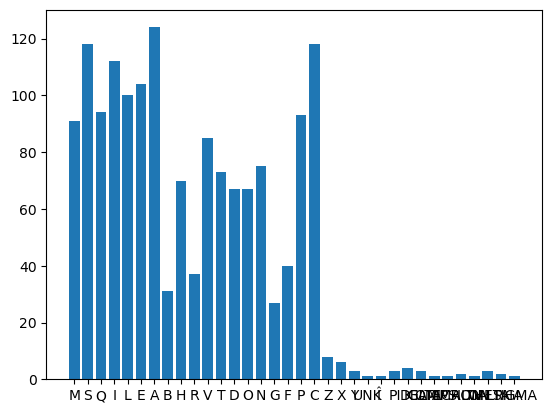

In [157]:
# Check the distribution
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter


images = list(Path("images").rglob("*.jpg"))
letters = [image.name.split("_")[1].split(".")[0] for image in images]

for i,letter in enumerate(letters):
    # Small letters to big letters
    if letter.islower():
        letters[i] = letter.upper()
    

letter_counter = Counter(letters)
print(letter_counter)

# Which alphabet is missing
for letter in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
    if letter not in letter_counter:
        print(letter)

plt.bar(letter_counter.keys(), letter_counter.values())
plt.show()

# Ornamental letter recognition

(10, 10)
(17, 17)


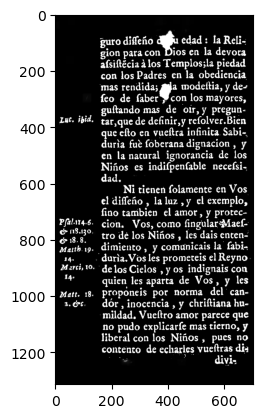

In [274]:
def remove_ornamental_simple(img):
    w,h = img.shape
    dilate_kernel_size = (min(w,h)//70, min(w,h)//70)
    print(dilate_kernel_size)

    dilate_kernel = np.ones(dilate_kernel_size, np.uint8)
    dilated = cv2.dilate(img, dilate_kernel, iterations=1)


    erode_kernel_size = (min(w,h)//40, min(w,h)//40)
    print(erode_kernel_size)
    erode_kernel = np.ones(erode_kernel_size, np.uint8)
    eroded = cv2.erode(dilated, erode_kernel, iterations=2)

    # Threshold again
    _, eroded = cv2.threshold(eroded, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Dilate again
    dilated_2 = cv2.dilate(eroded, dilate_kernel, iterations=1)

    # Print the mask
    #plt.imshow(dilated_2, cmap="gray")
    #plt.show

    # Find contours above threshold area 
    contours, _ = cv2.findContours(dilated_2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    min_area = 0.01 * w * h
    selected_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            selected_contours.append(contour)


    # create mask
    mask = np.zeros_like(img)
    cv2.drawContours(mask, selected_contours, -1, 255, -1)
    
    # Dilate the mask same as the erode kernel
    mask = cv2.dilate(mask, erode_kernel, iterations=2)

    #plt.imshow(mask, cmap="gray")
    #plt.show()

    # bitwise and
    result = cv2.bitwise_and(img, ~mask)





    return result

result = remove_ornamental_simple(img)

plt.imshow(result, cmap="gray")
plt.show()



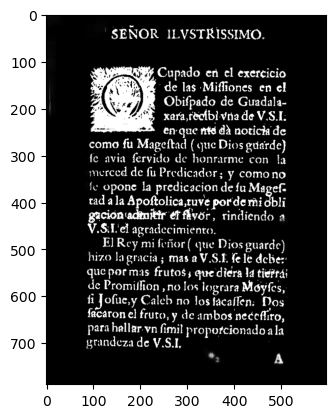

In [164]:
plt.imshow(img,cmap="gray")
plt.show()

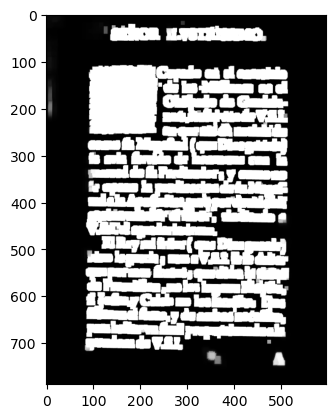

In [165]:
# Dilate the image
kernel = np.ones((8,8), np.uint8)
dilated = cv2.dilate(img, kernel, iterations=1)
plt.imshow(dilated, cmap="gray")
plt.show()

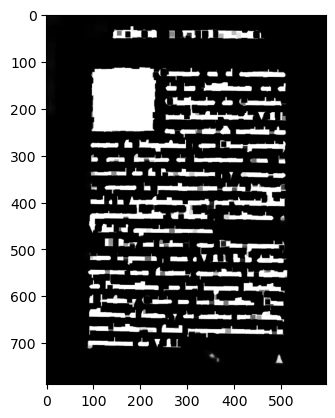

In [140]:
# Erode the image
kernel = np.ones((10,10), np.uint8)
eroded = cv2.erode(dilated, kernel, iterations=1)
plt.imshow(eroded, cmap="gray")
plt.show()

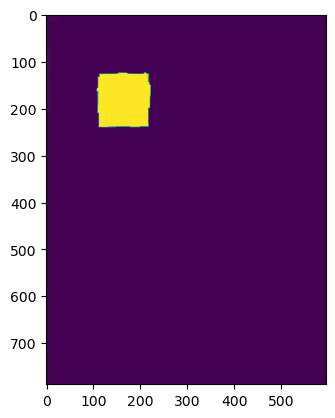

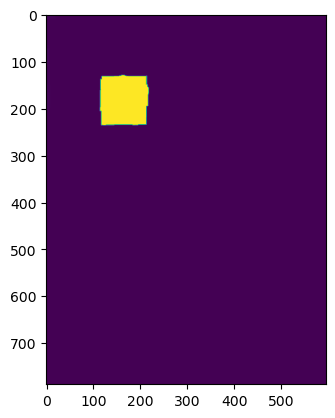

In [147]:

# erode the image to remove the noise further
kernel = np.ones((20,20), np.uint8)
eroded_2 = cv2.erode(eroded, kernel, iterations=1)

plt.imshow(eroded_2)
plt.show()

# Erode further to remove the noise
kernel = np.ones((10,10), np.uint8)
eroded_3 = cv2.erode(eroded_2, kernel, iterations=1)

plt.imshow(eroded_3)
plt.show()


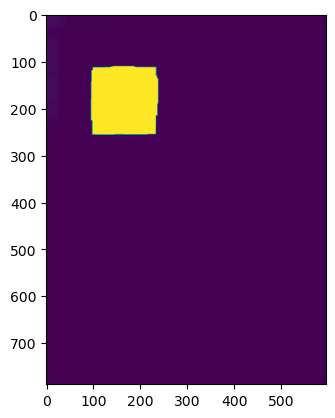

In [150]:
# Dilate the image to create a mask for the drop cap
kernel = np.ones((40,40), np.uint8)
dilated = cv2.dilate(eroded_3, kernel, iterations=1)

plt.imshow(dilated)
plt.show()


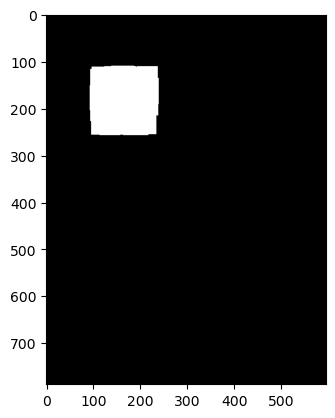

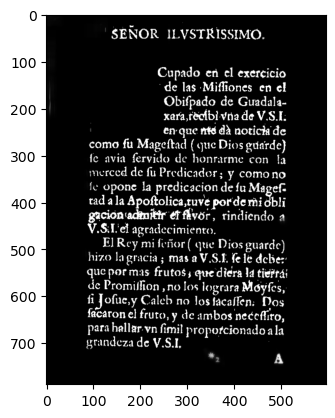

In [153]:
# Find the contours
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour
largest_contour = max(contours, key=cv2.contourArea)

# Create a mask
mask = np.zeros_like(dilated)

# Draw the largest contour on the mask
cv2.drawContours(mask, [largest_contour], -1, 255, -1)

# Show the mask
plt.imshow(mask, cmap="gray")
plt.show()

# Apply the mask to the original image to remove the drop cap
masked = cv2.bitwise_and(img, img, mask=~mask)

# Show the masked image
plt.imshow(masked, cmap="gray")
plt.show()

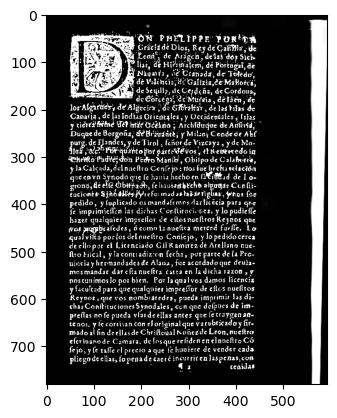

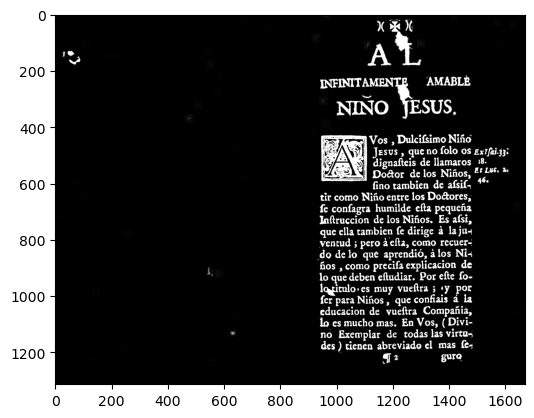

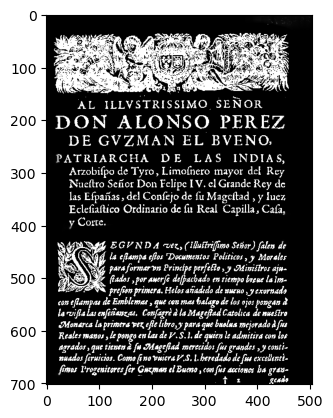

(8, 8)
(14, 14)
(18, 18)
(32, 32)
(7, 7)
(12, 12)


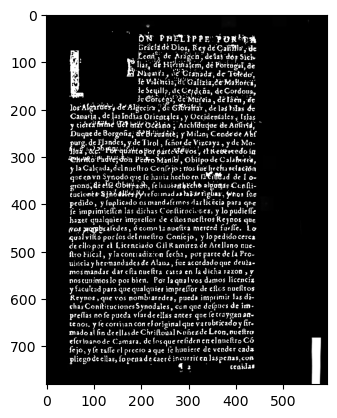

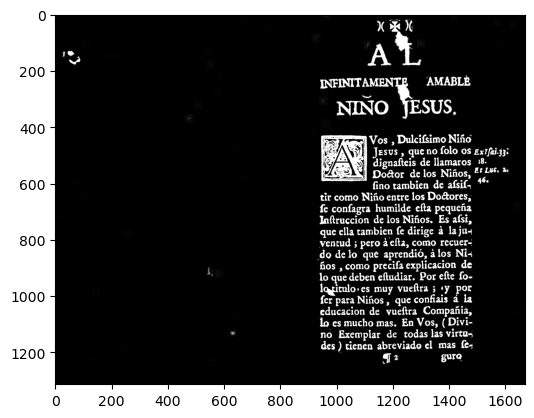

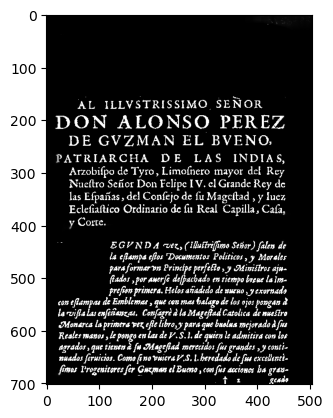

In [276]:
# Test on other images
image_1 = cv2.imread("Constituciones sinodales Calahorra 1602/Constituciones sinodales Calahorra 1602_0.png")
image_2 = cv2.imread("Buendia - Instruccion/Buendia - Instruccion_0.png")
image_3 = cv2.imread("Mendo - Principe perfecto/Mendo - Principe perfecto_0.png")

# Preprocess the images
preprocessed_1 = preprocess_image(image_1,align_text=False)
preprocessed_2 = preprocess_image(image_2,align_text=False)
preprocessed_3 = preprocess_image(image_3,align_text=False)

# Show images
plt.imshow(preprocessed_1, cmap="gray")
plt.show()

plt.imshow(preprocessed_2, cmap="gray")
plt.show()

plt.imshow(preprocessed_3, cmap="gray")
plt.show()

# Remove the drop cap"
result_1 = remove_ornamental_simple(preprocessed_1)
result_2 = remove_ornamental_simple(preprocessed_2)
result_3 = remove_ornamental_simple(preprocessed_3)


# Show the results
plt.imshow(result_1, cmap="gray")
plt.show()

plt.imshow(result_2, cmap="gray")
plt.show()

plt.imshow(result_3, cmap="gray")
plt.show()



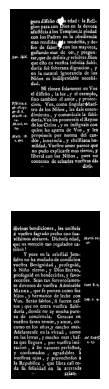

In [259]:
def split_text_vertical(image):

    # dilate the image
    w,h = image.shape
    kernel_size = (min(w,h)//100, min(w,h)//100)
    kernel = np.ones(kernel_size, np.uint8)
    dilated = cv2.dilate(image, kernel, iterations=3)

    # Find VPP
    vpp = np.sum(dilated == 255, axis=0)
    vpp = np.convolve(vpp, np.ones(10), mode='same')

    # Threshold the VPP
    threshold = 0.1 * np.max(vpp)

    # Find the columns where the sum of column values is lesser than the threshold
    columns = np.where(vpp < threshold)[0]

    # Combine consecutive columns
    consecutive_columns = []

    prev = columns[1]
    column_pixel_threshold = 2

    #print(len(columns))

    for column in columns:
        if column - prev > column_pixel_threshold:
            consecutive_columns.append((prev, column))

        prev = column

    #print(len(consecutive_columns))

    # store all columns
    images = []
    for col in consecutive_columns:
        images.append(image[:, col[0]:col[1]])



    return images

# Test the function
image = cv2.imread("Buendia - Instruccion/Buendia - Instruccion_1.png")
preprocessed_image = preprocess_image(image, align_text=False)
images = split_text_vertical(preprocessed_image)
for i, img in enumerate(images):
    plt.subplot(len(images), 1, i + 1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")

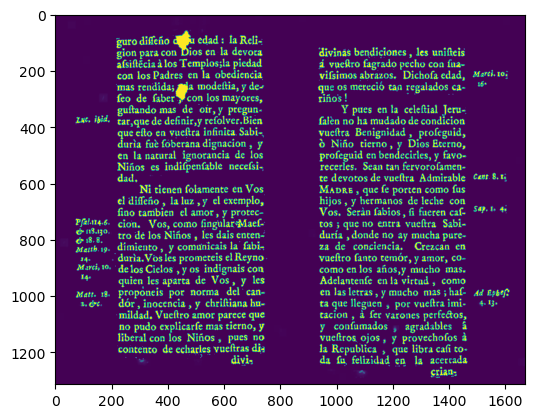

(10, 10)
(17, 17)
[(76, 115), (125, 151), (160, 193), (206, 232), (247, 314), (331, 356), (366, 395), (410, 435), (451, 476), (493, 517), (527, 556), (613, 638), (653, 679), (695, 720), (730, 760), (768, 801), (817, 842), (855, 881), (891, 921), (938, 962), (979, 1003), (1018, 1043), (1058, 1084), (1099, 1125), (1138, 1164), (1180, 1206)]


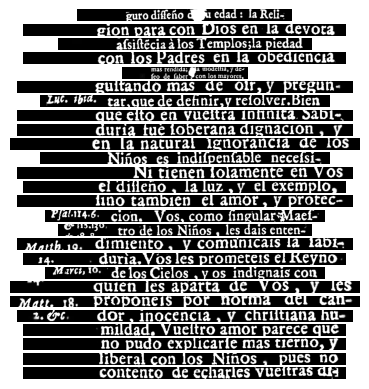

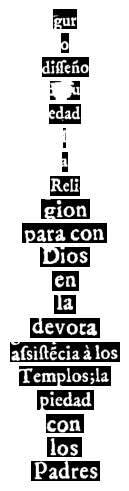

(9, 9)
(17, 17)
[(123, 152), (168, 193), (203, 233), (250, 274), (330, 354), (370, 395), (409, 437), (449, 476), (492, 517), (533, 557), (570, 597), (614, 639), (654, 678), (688, 718), (735, 759), (776, 800), (817, 840), (857, 881), (898, 921), (937, 962), (978, 1003), (1018, 1043), (1060, 1083), (1099, 1124), (1140, 1164), (1177, 1205), (1218, 1244), (1275, 1280)]


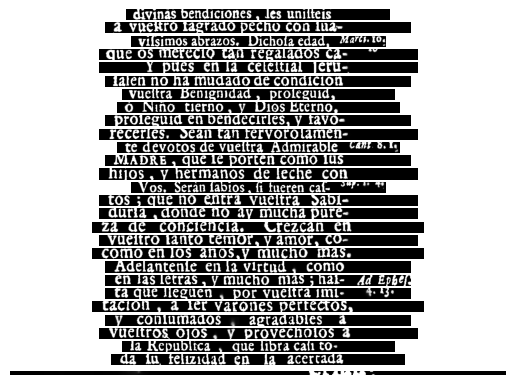

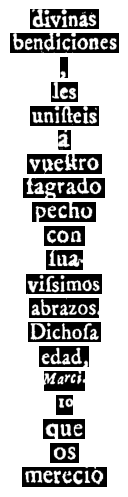

In [302]:
# Pipeline

image = cv2.imread("Buendia - Instruccion/Buendia - Instruccion_1.png")
preprocessed_image = preprocess_image(image, align_text=False)

plt.imshow(preprocessed_image)
plt.show()
images = split_text_vertical(preprocessed_image)


for i, sub_img in enumerate(images):
    result = remove_ornamental_simple(sub_img)
    rows = split_rows(result)
    print(rows)
    for j, (start, end) in enumerate(rows):
        row_img = result[start:end]
        plt.subplot(len(rows), 1, j + 1)
        plt.imshow(row_img, cmap="gray")
        plt.axis("off")
    plt.show()

    # words
    bounding_boxes = split_text_into_words(result, rows)
    #print(bounding_boxes)
    # Show the first n words
    n_words = 20
    plt.figure(figsize=(30, 50))
    for j, (start_row, end_row, start_col, end_col) in enumerate(bounding_boxes[:n_words]):
        plt.subplot(len(bounding_boxes), 1, j + 1)
        plt.imshow(result[start_row-5:end_row+2, start_col-1:end_col+1], cmap="gray")
        plt.axis("off")



    plt.show()
    


# 